# Intuisi Regresi Linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)


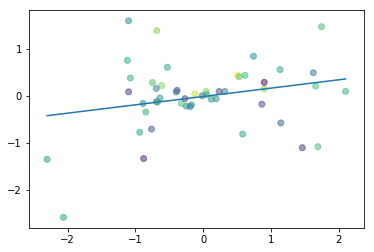

In [5]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# Regresi Linear dengan PyTorch

In [6]:
x = [x for x in range(11)]

In [7]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
X_train = np.array(x, dtype=np.float32)

In [24]:
X_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [25]:
X_train.shape

(11,)

In [26]:
X_train = X_train.reshape(-1, 1)

In [27]:
X_train.shape

(11, 1)

In [28]:
X_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [29]:
X_train.dtype

dtype('float32')

In [30]:
y = [2 * i + 1 for i in x]

In [31]:
y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [32]:
y_train = np.array(y, dtype=np.float32)

In [33]:
y_train

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)

In [34]:
y_train.shape

(11,)

In [35]:
y_train = y_train.reshape(-1, 1)

In [36]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

# Membuat model

In [38]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [40]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [41]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [43]:
criterion = nn.MSELoss()

In [44]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
epochs = 100

In [48]:
for epoch in range(epochs):
    epoch += 1
    
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    print("epoch {}, loss {}".format(epoch, loss.data[0]))
    

epoch 1, loss 0.22487510740756989
epoch 2, loss 0.22236377000808716
epoch 3, loss 0.21988064050674438
epoch 4, loss 0.21742525696754456
epoch 5, loss 0.214997336268425
epoch 6, loss 0.2125963717699051
epoch 7, loss 0.21022242307662964
epoch 8, loss 0.20787490904331207
epoch 9, loss 0.20555372536182404
epoch 10, loss 0.20325809717178345
epoch 11, loss 0.20098847150802612
epoch 12, loss 0.19874407351016998
epoch 13, loss 0.19652466475963593
epoch 14, loss 0.1943303644657135
epoch 15, loss 0.19215993583202362
epoch 16, loss 0.19001446664333344
epoch 17, loss 0.1878923922777176
epoch 18, loss 0.18579429388046265
epoch 19, loss 0.18371953070163727
epoch 20, loss 0.18166808784008026
epoch 21, loss 0.17963923513889313
epoch 22, loss 0.17763341963291168
epoch 23, loss 0.1756497025489807
epoch 24, loss 0.17368832230567932
epoch 25, loss 0.17174869775772095
epoch 26, loss 0.16983091831207275
epoch 27, loss 0.16793441772460938
epoch 28, loss 0.1660590022802353
epoch 29, loss 0.16420458257198334
e

In [51]:
predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()
predicted

array([[ 0.49403512],
       [ 2.5668988 ],
       [ 4.6397624 ],
       [ 6.712626  ],
       [ 8.785489  ],
       [10.858353  ],
       [12.931216  ],
       [15.00408   ],
       [17.076944  ],
       [19.149809  ],
       [21.222672  ]], dtype=float32)

In [52]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

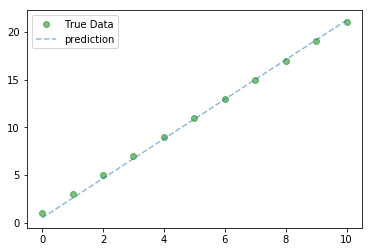

In [54]:
plt.clf()

plt.plot(X_train, y_train, 'go', label='True Data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='prediction', alpha=0.5)

plt.legend(loc='best')
plt.show()

# Menyimpan Model

In [57]:
save_model = False
if save_model:
    torch.save(model.state_dict(), 'linear_regression_model.pkl')

# Mengeluarkan Model

In [58]:
load_model = False
if load_model:
    model.load_state_dict(torch.load('linear_regression_model.pkl'))